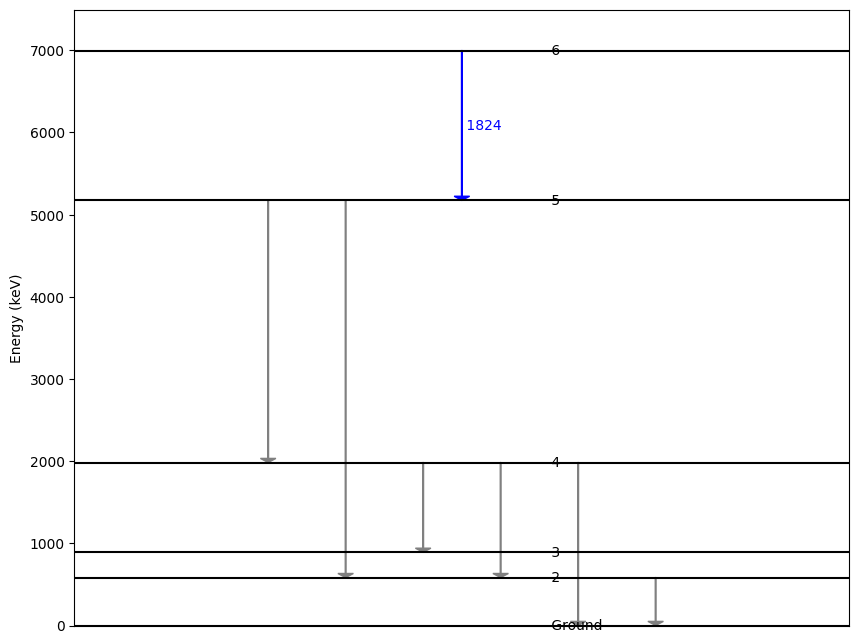

In [51]:
import matplotlib.pyplot as plt

# Define the energy levels and transitions, including the new red and green ones
levels = [
    (6996.9, '6'),
    (5174, '5'),
    (1983.5, '4'),
    (890.89, '3'),
    (583.05, '2'),
    (0.0, 'Ground')
]

transitions_multiple_arrows = [
    (1, 0, '1824', 'blue', 0),

    # New transitions
    (2, 1, '', 'gray', -0.25),
    (4, 1, '', 'gray', -0.15),
    (3, 2, '', 'gray', -0.05),
    (4, 2, '', 'gray', 0.05),
    (5, 2, '', 'gray', 0.15),
    (5, 4, '', 'gray', 0.25),
    (5, 5, '', 'gray', 0.35),

]

# Function to create a level scheme with multiple vertical arrows
def create_level_scheme_multiple_arrows(levels, transitions):
    # Create a figure and an axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Set the limits and labels of the axis
    ax.set_xlim(0, 1)
    ax.set_ylim(0, max(levels, key=lambda x: x[0])[0] + 500)
    ax.set_ylabel('Energy (keV)')
    ax.set_xticks([])  # Hide the x-axis ticks

    # Draw the energy levels
    for i, (energy, label) in enumerate(levels):
        ax.hlines(energy, 0, 1, color='black')  # Centralize the energy level on the x-axis
        ax.text(0.61, energy, f' {label}', verticalalignment='center')

    # Draw the transitions
    for start, end, label, color, offset in transitions:
        # The start_energy for blue arrows is the max energy level (start from the top)
        start_energy = max(levels, key=lambda x: x[0])[0] if color == 'blue' else levels[end][0]
        end_energy = levels[start][0]
        # Adjust the x-position based on the offset
        ax.arrow(0.5 + offset, start_energy, 0, end_energy - start_energy,
                 length_includes_head=True, head_width=0.02, head_length=50, color=color)
        mid_energy = (start_energy + end_energy) / 2
        ax.text(0.5 + offset, mid_energy, f' {label}', color=color, verticalalignment='center', horizontalalignment='left')

    # Show the plot
    plt.show()

# Create the diagram with the updated transitions
create_level_scheme_multiple_arrows(levels, transitions_multiple_arrows)


(0.0, 30.0)

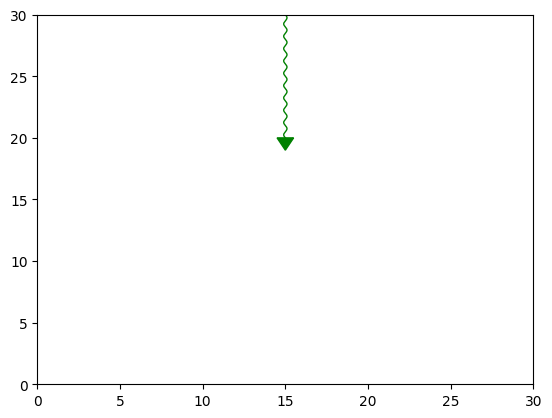

In [9]:


def curly_arrow(start, end, arr_size = 1, n = 5, col='green', linew=1., width = 0.1):
    xmin, ymin = start
    xmax, ymax = end
    dist = np.sqrt((xmin - xmax)**2 + (ymin - ymax)**2)
    n0 = dist / (2 * np.pi)
    
    x = np.linspace(0, dist, 151) + xmin
    y = width * np.sin(n * x / n0) + ymin
    line = plt.Line2D(x,y, color=col, lw=linew)
    
    del_x = xmax - xmin
    del_y = ymax - ymin
    ang = np.arctan2(del_y, del_x)
    
    line.set_transform(mpl.transforms.Affine2D().rotate_around(xmin, ymin, ang) + ax.transData)
    ax.add_line(line)

    verts = np.array([[0,1],[0,-1],[2,0],[0,1]]).astype(float) * arr_size
    verts[:,1] += ymax
    verts[:,0] += xmax
    path = mpath.Path(verts)
    patch = mpatches.PathPatch(path, fc=col, ec=col)

    patch.set_transform(mpl.transforms.Affine2D().rotate_around(xmax, ymax, ang) + ax.transData)
    return patch

fig, ax = plt.subplots()    
ax.add_patch(curly_arrow((15, 30), (15, 20), n=10, arr_size=.5))
ax.set_xlim(0,30)
ax.set_ylim(0,30)